In [1]:
#Import Depdencies
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import numpy as np

In [2]:
#file_path = "testingdata.csv"
file_path = "../Patrick/Resources/FINAL_opioid_data_UNCLEAN3.csv"
raw_input_df = pd.read_csv(file_path)
raw_input_df.head()

,Year,countycode,State,county,population,deaths,cruderate,DispenseRate,PersonalIncome,PerCapitaPersonalIncome,...,SomeCollege,BachelorOrHigher,PovertyPop,PovertyRate,UnemployedPop,UnemployedRate,LessThanHSRate,HSDiplomaOnlyRate,SomeCollegeRate,BachelorOrHigherRate
0,2020,1001,AL,"Autauga County, AL",56145,Suppressed,Suppressed,98.3,45248.0,58877.0,...,16113.62,15776.75,6242.0,11.2,1420.0,5.4,10.4,32.8,28.7,28.1
1,2020,1003,AL,"Baldwin County, AL",229287,41,17.9,65.0,51348.0,233140.0,...,71537.54,74518.28,20189.0,8.9,6159.0,6.2,9.0,27.4,31.2,32.5
2,2020,1005,AL,"Barbour County, AL",24589,Suppressed,Suppressed,22.8,37120.0,25180.0,...,6835.74,2753.97,5548.0,25.5,676.0,7.8,24.3,36.7,27.8,11.2
3,2020,1007,AL,"Bibb County, AL",22136,Suppressed,Suppressed,24.8,34598.0,22223.0,...,5467.59,2634.18,3549.0,17.8,639.0,7.3,19.5,43.9,24.7,11.9
4,2020,1009,AL,"Blount County, AL",57879,Suppressed,Suppressed,22.8,38351.0,59081.0,...,19447.34,8623.97,7525.0,13.1,1143.0,4.6,16.4,35.1,33.6,14.9


In [3]:
raw_input_df.dtypes

Year                         int64
countycode                   int64
State                       object
county                      object
population                   int64
deaths                      object
cruderate                   object
DispenseRate               float64
PersonalIncome             float64
PerCapitaPersonalIncome    float64
LessThanHS                 float64
HSDiplomaOnly              float64
SomeCollege                float64
BachelorOrHigher           float64
PovertyPop                 float64
PovertyRate                float64
UnemployedPop              float64
UnemployedRate             float64
LessThanHSRate             float64
HSDiplomaOnlyRate          float64
SomeCollegeRate            float64
BachelorOrHigherRate       float64
dtype: object

In [4]:
input_df = raw_input_df.dropna().copy()
input_df = input_df.loc[(input_df["deaths"]!="Suppressed")]
input_df.head()

,Year,countycode,State,county,population,deaths,cruderate,DispenseRate,PersonalIncome,PerCapitaPersonalIncome,...,SomeCollege,BachelorOrHigher,PovertyPop,PovertyRate,UnemployedPop,UnemployedRate,LessThanHSRate,HSDiplomaOnlyRate,SomeCollegeRate,BachelorOrHigherRate
1,2020,1003,AL,"Baldwin County, AL",229287,41,17.9,65.0,51348.0,233140.0,...,71537.54,74518.28,20189.0,8.9,6159.0,6.2,9.0,27.4,31.2,32.5
27,2020,1055,AL,"Etowah County, AL",102371,13,12.7,102.8,39795.0,103393.0,...,35215.62,18426.78,15650.0,15.6,3505.0,8.5,13.8,33.8,34.4,18.0
36,2020,1073,AL,"Jefferson County, AL",655342,227,34.6,139.0,58053.0,673341.0,...,195947.26,227403.67,92310.0,14.4,21947.0,6.9,9.0,26.4,29.9,34.7
44,2020,1089,AL,"Madison County, AL",379453,68,17.9,87.3,56499.0,389696.0,...,108144.11,168097.68,39100.0,10.5,9761.0,5.1,8.0,19.2,28.5,44.3
48,2020,1097,AL,"Mobile County, AL",412716,46,11.1,98.0,42837.0,414250.0,...,122576.65,98639.12,71398.0,17.6,16931.0,8.7,12.1,34.2,29.7,23.9


In [5]:
print(len(input_df))
test_df = input_df.loc[(input_df['cruderate']!='Unreliable')]
print(len(test_df))

3056
3056


In [6]:
cleaned_test_df = test_df.astype({"cruderate":"float64"}, copy=True)
#cleaned_test_df["PovertyPop"] = cleaned_test_df["PovertyPop"].str.replace(",","")
#cleaned_test_df["UnemployedPop"] = cleaned_test_df["UnemployedPop"].str.replace(",","")
#cleaned_test_df = cleaned_test_df.astype({"PovertyPop":"float64","UnemployedPop":"float64"})
#cleaned_test_df["LessThanHS"] = cleaned_test_df["LessThanHS"]
#cleaned_test_df["HSDiplomaOnly"] = cleaned_test_df["HSDiplomaOnly"]
#cleaned_test_df["SomeCollege"] = cleaned_test_df["SomeCollege"]
#cleaned_test_df["BachelorOrHigher"] = cleaned_test_df["BachelorOrHigher"]
cleaned_test_df.head()

,Year,countycode,State,county,population,deaths,cruderate,DispenseRate,PersonalIncome,PerCapitaPersonalIncome,...,SomeCollege,BachelorOrHigher,PovertyPop,PovertyRate,UnemployedPop,UnemployedRate,LessThanHSRate,HSDiplomaOnlyRate,SomeCollegeRate,BachelorOrHigherRate
1,2020,1003,AL,"Baldwin County, AL",229287,41,17.9,65.0,51348.0,233140.0,...,71537.54,74518.28,20189.0,8.9,6159.0,6.2,9.0,27.4,31.2,32.5
27,2020,1055,AL,"Etowah County, AL",102371,13,12.7,102.8,39795.0,103393.0,...,35215.62,18426.78,15650.0,15.6,3505.0,8.5,13.8,33.8,34.4,18.0
36,2020,1073,AL,"Jefferson County, AL",655342,227,34.6,139.0,58053.0,673341.0,...,195947.26,227403.67,92310.0,14.4,21947.0,6.9,9.0,26.4,29.9,34.7
44,2020,1089,AL,"Madison County, AL",379453,68,17.9,87.3,56499.0,389696.0,...,108144.11,168097.68,39100.0,10.5,9761.0,5.1,8.0,19.2,28.5,44.3
48,2020,1097,AL,"Mobile County, AL",412716,46,11.1,98.0,42837.0,414250.0,...,122576.65,98639.12,71398.0,17.6,16931.0,8.7,12.1,34.2,29.7,23.9


In [7]:
cleaned_test_df.dtypes

Year                         int64
countycode                   int64
State                       object
county                      object
population                   int64
deaths                      object
cruderate                  float64
DispenseRate               float64
PersonalIncome             float64
PerCapitaPersonalIncome    float64
LessThanHS                 float64
HSDiplomaOnly              float64
SomeCollege                float64
BachelorOrHigher           float64
PovertyPop                 float64
PovertyRate                float64
UnemployedPop              float64
UnemployedRate             float64
LessThanHSRate             float64
HSDiplomaOnlyRate          float64
SomeCollegeRate            float64
BachelorOrHigherRate       float64
dtype: object

The code below was an early attempt to answer a slightly different question where i compared each cruderate to the other cruderates of the same year.  To match other models I comared each to the entire data set instead.  I've kept the code intact for any future analysis.

In [8]:
#data2020 =  cleaned_test_df.loc[(test_df["Year"]==2020),"cruderate"]
data2020 = cleaned_test_df["cruderate"]
quartile75_2020 = np.percentile(data2020, 75)
print(quartile75_2020)

30.9


In [9]:
#data2019 =  cleaned_test_df.loc[(test_df["Year"]==2019),"cruderate"]
data2019 = cleaned_test_df["cruderate"]
quartile75_2019 = np.percentile(data2019, 75)
print(quartile75_2019)

30.9


In [10]:
#data2018 =  cleaned_test_df.loc[(test_df["Year"]==2018),"cruderate"]
data2018 = cleaned_test_df["cruderate"]
quartile75_2018 = np.percentile(data2018, 75)
print(quartile75_2018)

30.9


In [11]:
#data2017 =  cleaned_test_df.loc[(test_df["Year"]==2017),"cruderate"]
data2017 = cleaned_test_df["cruderate"]
quartile75_2017 = np.percentile(data2017, 75)
print(quartile75_2017)

30.9


In [12]:
print(cleaned_test_df["Year"].values)

[2020 2020 2020 ... 2017 2017 2017]


In [13]:
#Based off what I saw online, itterows seems to be a less effecient process so I decided to add my classifier
#column this way.  Also, the multiple if statements are necessary due to the quartile code above
solution_series = []
year_series = cleaned_test_df["Year"].values
test1 = cleaned_test_df["cruderate"].values
#print(year_series[0])
for i in range(len(year_series)):
    if year_series[i]==2017:
        if test1[i]>=quartile75_2017:
            solution_series.append(1)
        else:
            solution_series.append(0)
    elif year_series[i]==2018:
        if test1[i]>=quartile75_2018:
            solution_series.append(1)
        else:
            solution_series.append(0)
    elif year_series[i]==2019:
        if test1[i]>=quartile75_2019:
            solution_series.append(1)
        else:
            solution_series.append(0)
    elif year_series[i]==2020:
        if test1[i]>=quartile75_2020:
            solution_series.append(1)
        else:
            solution_series.append(0)

#print(solution_series)

In [14]:
cleaned_test_df["Class"] = solution_series

print(cleaned_test_df["Class"].value_counts())

0    2290
1     766
Name: Class, dtype: int64


In [15]:
X = cleaned_test_df.copy()
X = X.drop(["State","county","countycode","Year","Class","cruderate","deaths","LessThanHSRate",
            "HSDiplomaOnlyRate","SomeCollegeRate","BachelorOrHigherRate","PovertyRate","UnemployedPop"],axis=1)
X.head()

,population,DispenseRate,PersonalIncome,PerCapitaPersonalIncome,LessThanHS,HSDiplomaOnly,SomeCollege,BachelorOrHigher,PovertyPop,UnemployedRate
1,229287,65.0,51348.0,233140.0,20635.83,62824.64,71537.54,74518.28,20189.0,6.2
27,102371,102.8,39795.0,103393.0,14127.20,34601.40,35215.62,18426.78,15650.0,8.5
36,655342,139.0,58053.0,673341.0,58980.78,173010.29,195947.26,227403.67,92310.0,6.9
44,379453,87.3,56499.0,389696.0,30356.24,72854.98,108144.11,168097.68,39100.0,5.1
48,412716,98.0,42837.0,414250.0,49938.64,141148.87,122576.65,98639.12,71398.0,8.7


In [16]:
y = cleaned_test_df["Class"]

In [17]:
X_train, X_test,y_train, y_test = train_test_split(X,y,random_state = 94)

In [18]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [19]:
rf_model = RandomForestClassifier(n_estimators=128, random_state=94) 

In [20]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [21]:
predictions = rf_model.predict(X_test_scaled)

In [22]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

#cm_df

In [23]:
acc_score = accuracy_score(y_test, predictions)

In [24]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,528,38
Actual 1,102,96


Accuracy Score : 0.8167539267015707
Classification Report
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       566
           1       0.72      0.48      0.58       198

    accuracy                           0.82       764
   macro avg       0.78      0.71      0.73       764
weighted avg       0.81      0.82      0.80       764



In [28]:
# Calculate feature importance in the Random Forest model.
importances = rf_model.feature_importances_
importance_headers = X.columns
importance_headers
importance_df = pd.DataFrame({"Features":importance_headers,"Importance":importances})
importance_df

,Features,Importance
0,population,0.170988
1,DispenseRate,0.073677
2,PersonalIncome,0.079453
3,PerCapitaPersonalIncome,0.149795
4,LessThanHS,0.087364
5,HSDiplomaOnly,0.097239
6,SomeCollege,0.087017
7,BachelorOrHigher,0.084779
8,PovertyPop,0.085069
9,UnemployedRate,0.084620


In [29]:
#I just want to try out SMOTEENN
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)

In [30]:
scaler2 = StandardScaler()
X_scaler2 = scaler2.fit(X_resampled)
X_train2_scaled = X_scaler2.transform(X_resampled)
X_test2_scaled = X_scaler2.transform(X_test)

In [31]:
rf_model2 = RandomForestClassifier(n_estimators=128, random_state=94) 

In [32]:
rf_model2 = rf_model2.fit(X_train2_scaled, y_resampled)

In [33]:
predictions2 = rf_model2.predict(X_test_scaled)

In [34]:
cm2 = confusion_matrix(y_test, predictions2)
cm2_df = pd.DataFrame(
    cm2, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

#cm2_df

In [35]:
acc_score2 = accuracy_score(y_test, predictions2)

In [36]:
# Displaying results
print("Confusion Matrix")
display(cm2_df)
print(f"Accuracy Score : {acc_score2}")
print("Classification Report")
print(classification_report(y_test, predictions2))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,436,130
Actual 1,56,142


Accuracy Score : 0.756544502617801
Classification Report
              precision    recall  f1-score   support

           0       0.89      0.77      0.82       566
           1       0.52      0.72      0.60       198

    accuracy                           0.76       764
   macro avg       0.70      0.74      0.71       764
weighted avg       0.79      0.76      0.77       764



In [37]:
# Calculate feature importance in the Random Forest model.
importances2 = rf_model2.feature_importances_
importance_df["Importance_Smoteen"] = importances2
importance_df

,Features,Importance,Importance_Smoteen
0,population,0.170988,0.189807
1,DispenseRate,0.073677,0.057311
2,PersonalIncome,0.079453,0.083428
3,PerCapitaPersonalIncome,0.149795,0.151134
4,LessThanHS,0.087364,0.083018
5,HSDiplomaOnly,0.097239,0.102852
6,SomeCollege,0.087017,0.085676
7,BachelorOrHigher,0.084779,0.086892
8,PovertyPop,0.085069,0.066829
9,UnemployedRate,0.084620,0.093053


In [41]:
#I was curious if there was a significant difference if I used balanced accuracy score and imbalanced classification reports... There was not
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predictions2)

0.7437448691865653

In [42]:
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, predictions2))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.89      0.77      0.72      0.82      0.74      0.56       566
          1       0.52      0.72      0.77      0.60      0.74      0.55       198

avg / total       0.79      0.76      0.73      0.77      0.74      0.55       764



In [43]:
#ROC curves/AUC scores are another way to measure the ability of classifying models
import sklearn.metrics as metrics

In [44]:
probs = rf_model.predict_proba(X_test_scaled)
predictions3 = probs[:,1]

In [45]:

fpr, tpr, threshold = metrics.roc_curve(y_test, predictions3)
roc_auc = metrics.auc(fpr, tpr)

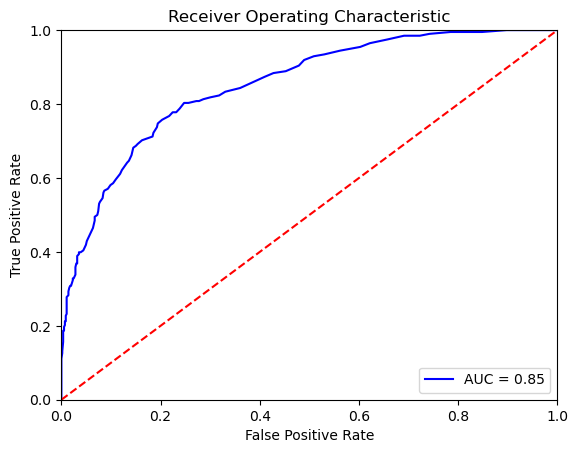

In [46]:
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [47]:
print(roc_auc)

0.851300103508584
